##                                          CI Homework5 (Project)
###                           Mahdi Samimi (9529583) & Sajad Goudarzi (9532493)

First of all we use scikit-fuzzy to model the problem:

In [1]:
import numpy as np
import skfuzzy as skf
import matplotlib.pyplot as plt

Qestion1:
First we declare Question Variables :

In [2]:
x_pos = np.arange(0, 20.01, 0.01) #Variable for position of truck
x_t_ang = np.arange(-90, 270.01, 0.01) #Variable for angle between truck and Horizon level
y_ang = np.arange(-40, 40.01, 0.01) #Variable for angle of truck steering

Now its time to generate fuzzy membership fucntions:

In [3]:
pos_mf = {}
#position
pos_mf['pos_S2'] =  skf.trapmf(x_pos, [0, 0, 1.5, 7])
pos_mf['pos_S1'] =  skf.trimf(x_pos, [4, 7, 10])
pos_mf['pos_CE'] =  skf.trimf(x_pos, [9, 10, 11])
pos_mf['pos_B1'] =  skf.trimf(x_pos, [10, 13, 16])
pos_mf['pos_B2'] =  skf.trapmf(x_pos, [13, 18.5, 20, 20])
print(pos_mf['pos_S2'])
t_ang_mf = {}
#truck angle
t_ang_mf['t_ang_S3'] =  skf.trimf(x_t_ang, [-115, -65, -15])
t_ang_mf['t_ang_S2'] =  skf.trimf(x_t_ang, [-45, 0, 45])
t_ang_mf['t_ang_S1'] =  skf.trimf(x_t_ang, [15, 52.5, 90])
t_ang_mf['t_ang_CE'] =  skf.trimf(x_t_ang, [80, 90, 100])
t_ang_mf['t_ang_B1'] =  skf.trimf(x_t_ang, [90, 127.5, 165])
t_ang_mf['t_ang_B2'] =  skf.trimf(x_t_ang, [135, 180, 225])
t_ang_mf['t_ang_B3'] =  skf.trimf(x_t_ang, [195, 245, 295])

ang_mf = {}
#steering angle
ang_mf['ang_S3'] = skf.trimf(y_ang, [-40, -40, -20])
ang_mf['ang_S2'] = skf.trimf(y_ang, [-33, -20, -7])
ang_mf['ang_S1'] = skf.trimf(y_ang, [-14, -7, 0])
ang_mf['ang_CE'] = skf.trimf(y_ang, [-4, 0, 4])
ang_mf['ang_B1'] = skf.trimf(y_ang, [0, 7, 14])
ang_mf['ang_B2'] = skf.trimf(y_ang, [7, 20, 33])
ang_mf['ang_B3'] = skf.trimf(y_ang, [20, 40, 40])
print(ang_mf['ang_S2'])
print(np.count_nonzero(ang_mf['ang_S2']))
print(np.where(ang_mf['ang_S2'] > .9999))


[1. 1. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
2600
(array([2000], dtype=int64),)


After that we visualize membership functions:

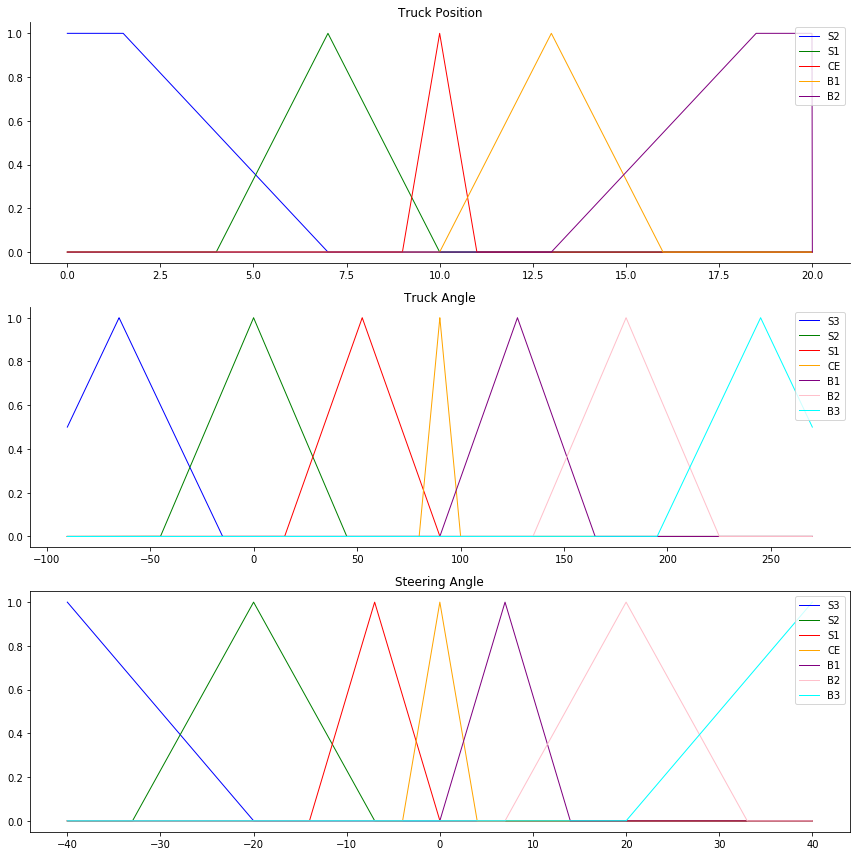

In [4]:
figure, (ax_pos, ax_t_ang, ax_ang) = plt.subplots(nrows = 3, figsize=(12, 12))
#Plottong Truck Position
ax_pos.plot(x_pos, pos_mf['pos_S2'], 'b', linewidth=1, label='S2')
ax_pos.plot(x_pos, pos_mf['pos_S1'], 'g', linewidth=1, label='S1')
ax_pos.plot(x_pos, pos_mf['pos_CE'], 'r', linewidth=1, label='CE')
ax_pos.plot(x_pos, pos_mf['pos_B1'], 'orange', linewidth=1, label='B1')
ax_pos.plot(x_pos, pos_mf['pos_B2'], 'purple', linewidth=1, label='B2')
ax_pos.set_title('Truck Position')
ax_pos.legend(loc='upper right')

#Plotting Truck Angle
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_S3'], 'b', linewidth=1, label='S3')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_S2'], 'g', linewidth=1, label='S2')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_S1'], 'r', linewidth=1, label='S1')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_CE'], 'orange', linewidth=1, label='CE')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_B1'], 'purple', linewidth=1, label='B1')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_B2'], 'pink', linewidth=1, label='B2')
ax_t_ang.plot(x_t_ang, t_ang_mf['t_ang_B3'], 'cyan', linewidth=1, label='B3')
ax_t_ang.set_title('Truck Angle')
ax_t_ang.legend(loc='upper right')

#Plotting Steering Angle
ax_ang.plot(y_ang, ang_mf['ang_S3'], 'b', linewidth=1, label='S3')
ax_ang.plot(y_ang, ang_mf['ang_S2'], 'g', linewidth=1, label='S2')
ax_ang.plot(y_ang, ang_mf['ang_S1'], 'r', linewidth=1, label='S1')
ax_ang.plot(y_ang, ang_mf['ang_CE'], 'orange', linewidth=1, label='CE')
ax_ang.plot(y_ang, ang_mf['ang_B1'], 'purple', linewidth=1, label='B1')
ax_ang.plot(y_ang, ang_mf['ang_B2'], 'pink', linewidth=1, label='B2')
ax_ang.plot(y_ang, ang_mf['ang_B3'], 'cyan', linewidth=1, label='B3')
ax_ang.set_title('Steering Angle')
ax_ang.legend(loc='upper right')

#Some other customizations ...
for ax in (ax_pos, ax_t_ang, ax_t_ang):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()


Then we declare our traning data:

In [5]:
from data import traning_data

And create rules using traning data:

In [6]:
rules = []
for data in traning_data:
    max_val = 0
    membership_fucntion = ''
    rule = []
    
    pos_val = 0
    for memfunc in pos_mf.keys():
        if (skf.interp_membership(x_pos, pos_mf[memfunc], data[0]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(x_pos, pos_mf[memfunc], data[0])
    rule.append(membership_fucntion)
    pos_val = max_val
    max_val = 0
    
    t_ang_val  = 0
    for memfunc in t_ang_mf.keys():
        if (skf.interp_membership(x_t_ang, t_ang_mf[memfunc], data[1]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(x_t_ang, t_ang_mf[memfunc], data[1])
    rule.append(membership_fucntion)
    t_ang_val = max_val
    max_val = 0
    
    ang_val = 0
    for memfunc in ang_mf.keys():
        if (skf.interp_membership(y_ang, ang_mf[memfunc], data[2]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(y_ang, ang_mf[memfunc], data[2])
    rule.append(membership_fucntion)
    ang_val = max_val
    rule.append(pos_val*t_ang_val*ang_val)
    rules.append(rule)
print(len(rules))

238


now we have created a list of rules and their degrees its time to choose the one's with higher degree.
First we group rules by first and second element:

In [7]:
first_two_elements_vals = set(map(lambda x:(x[0],x[1]),  rules))
grouped_list = [[y for y in rules if y[0]==x[0] and y[1]==x[1]] for x in first_two_elements_vals ]
print(len(grouped_list))

27


###                           Q1

Then we need to sort every group to find best degree of each rule:

In [8]:
print('Q1 solution: \n Rules Extracted : \n')
rule_num = 1
final_rules = []
for mem in grouped_list:
    mem.sort(reverse=True, key=lambda a:a[3])
    rep = len(mem)
    mem = mem[0] #selecting the one with the best degree
    print(rule_num, ': if X in ', mem[0][4:], 'and Φ in ', mem[1][6:], 'the θ in', mem[2][4:] , 'repeated:' , rep)
    final_rules.append(mem)
    rule_num += 1

Q1 solution: 
 Rules Extracted : 

1 : if X in  CE and Φ in  CE the θ in CE repeated: 29
2 : if X in  S1 and Φ in  S3 the θ in S3 repeated: 4
3 : if X in  S2 and Φ in  B1 the θ in B3 repeated: 3
4 : if X in  S1 and Φ in  B1 the θ in B3 repeated: 5
5 : if X in  B1 and Φ in  B2 the θ in B2 repeated: 6
6 : if X in  B2 and Φ in  S1 the θ in S3 repeated: 3
7 : if X in  B1 and Φ in  S1 the θ in S3 repeated: 5
8 : if X in  S2 and Φ in  S3 the θ in S3 repeated: 5
9 : if X in  S2 and Φ in  S1 the θ in B1 repeated: 13
10 : if X in  B2 and Φ in  B3 the θ in B3 repeated: 5
11 : if X in  S2 and Φ in  CE the θ in B2 repeated: 2
12 : if X in  CE and Φ in  S1 the θ in S2 repeated: 21
13 : if X in  CE and Φ in  B2 the θ in B3 repeated: 1
14 : if X in  B1 and Φ in  B1 the θ in B1 repeated: 36
15 : if X in  B2 and Φ in  B1 the θ in S1 repeated: 13
16 : if X in  B2 and Φ in  B2 the θ in B2 repeated: 6
17 : if X in  S1 and Φ in  S2 the θ in S3 repeated: 6
18 : if X in  S1 and Φ in  S1 the θ in S1 repeated:

###                           Q2

Q2 solution: 
 Routing : 

--------------------------------START ROUTING------------------------------
[13, 30, -39.99999999999999, 1]
[13.66341394816894, 48.747237251037504, -40.0, 2]
[14.168529916752172, 67.49447450207501, -40.00000000000001, 3]
[14.461750684653005, 86.24171175311251, -22.767037540635588, 4]
[14.52219109056768, 97.39838983464125, -10.527411974783002, 5]
[14.395590831507734, 102.63983656881406, 2.4949879591957034, 6]
[14.176976543857899, 101.39263831661826, 3.3538409714201722, 7]
[13.979783471260989, 99.71643621234175, 1.6967375427108848, 8]
[13.81108533232916, 98.86816044518618, -3.3315509804258543, 9]
[13.657184522024199, 100.5332317843003, 5.142176883848471, 10]
[13.47511446319742, 97.96473330868392, -6.877706423183641, 11]
[13.337548019910237, 101.39738703268931, 6.0944750151344556, 12]
[13.141052254653562, 98.35446223419167, -4.681455095703004, 13]
[12.996240260768777, 100.69323563005595, 7.0, 14]
[12.812072720544078, 97.19977194506644, -9.017686161189332, 15]
[1

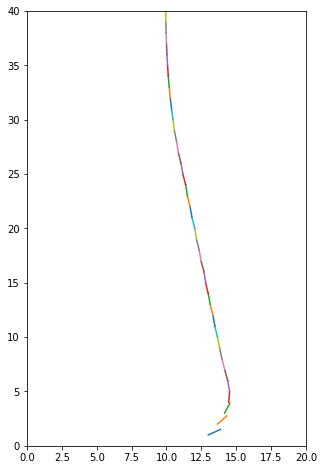

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[3, -30, -29.473684210526315, 1]
[3.753945931383923, -15.758359542040814, -20.45616885858011, 2]
[4.6556714545000615, -5.694519366819607, -26.779081587112753, 3]
[5.544016162376579, 7.324578289645601, -33.20693967516271, 4]
[6.373886562781439, 23.21701630757041, -27.436596854731754, 5]
[7.189534842067503, 36.536660580562994, -15.140831233864763, 6]
[7.96511966727417, 44.040708567561026, -7.884061996954745, 7]
[8.67717095344641, 47.973398485723926, -6.999999999999999, 8]
[9.341656348596251, 51.46686217071343, -14.915699571135592, 9]
[9.943633000267402, 58.86126899692337, -19.74620592754944, 10]
[10.430338013266578, 68.58671887118098, -24.023121496359444, 11]
[10.76380674060608, 80.33150359355315, -28.096528826591666, 12]
[10.911962423051152, 93.95137636516982, -11.736077231250675, 13]
[10.8444931154519, 99.788559368318, 9.789472329404834

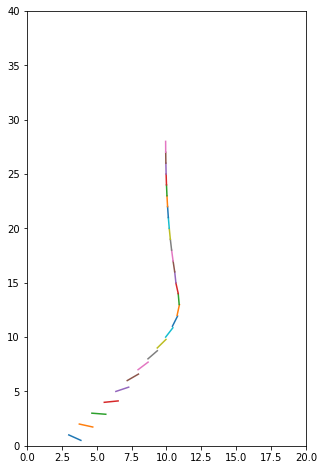

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[10, 90, -2.354205654194466e-19, 1]
# OF change Steering Angle :1


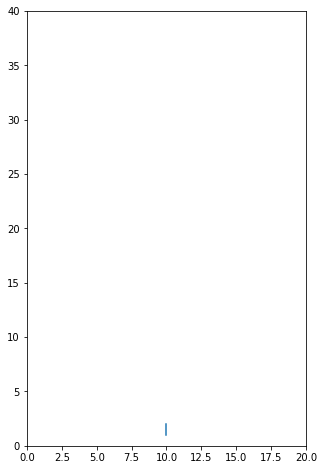

--------------------------------ROUTING ENDED------------------------------


In [9]:
print('Q2 solution: \n Routing : \n')
import math  
test_data = [(13,30),(3,-30),(10,90)]
tested_datas = []
for data1 in test_data:
    print("--------------------------------START ROUTING------------------------------")
    t = 0
    tested_data_rout = []
    tested_data = []
    tested_data.append(data1[0])
    tested_data.append(data1[1])
    while True:
        t = t + 1
        firstSigma = 0
        secondSigma = 0
        i = 0
        for ruleInFinalRules in final_rules:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            if ruleInFinalRules[2] == 'ang_S3':
                yi = -40
            if ruleInFinalRules[2] == 'ang_S2':
                yi = -20
            if ruleInFinalRules[2] == 'ang_S1':
                yi = -7
            if ruleInFinalRules[2] == 'ang_CE':
                yi = 0
            if ruleInFinalRules[2] == 'ang_B1':
                yi = 7
            if ruleInFinalRules[2] == 'ang_B2':
                yi = 20
            if ruleInFinalRules[2] == 'ang_B3':
                yi = 40
            firstSigma = firstSigma + miOi * yi
        for ruleInFinalRules in final_rules:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            secondSigma = secondSigma + miOi
        defuzzY = firstSigma / secondSigma
        tested_data.append(defuzzY)
        tested_data.append(t)
        print(tested_data)
        tested_data_rout.append(tested_data)
        new_tested_data = []
        b = 4
        new_tested_data.append(tested_data[0] + math.cos(math.radians(tested_data[1] + tested_data[2])) + math.sin(math.radians(tested_data[2])) * math.sin(math.radians(tested_data[1])))
        new_tested_data.append(tested_data[1] - math.degrees(math.asin((2*math.sin(math.radians(tested_data[2])))/b)))
        if tested_data[0] < 10.5 and tested_data[0] > 9.5 and tested_data[1] < 90.5 and tested_data[1] > 89.5:
            break
        tested_data = new_tested_data
    print("# OF change Steering Angle :"+str(len(tested_data_rout)))
    def draw_line(x,y,angle,length):
        cartesianAngleRadians = (angle)*math.pi/180.0
        terminus_x = x + length * math.cos(cartesianAngleRadians)
        terminus_y = y + length * math.sin(cartesianAngleRadians)
        plt.plot([x, terminus_x],[y,terminus_y])
    plt.figure(figsize=(5, 8))
    plt.axis([0,20,0,40])
    for i in range(0,len(tested_data_rout)):
        draw_line(tested_data_rout[i][0],tested_data_rout[i][3],tested_data_rout[i][1],1)
    plt.show()
    print("--------------------------------ROUTING ENDED------------------------------")

###                           Q3

In [10]:
from train_data import training_data2

In [11]:
ruleQ3 = []
for data in training_data2:
    max_val = 0
    membership_fucntion = ''
    rule = []
    
    pos_val = 0
    for memfunc in pos_mf.keys():
        if (skf.interp_membership(x_pos, pos_mf[memfunc], data[0]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(x_pos, pos_mf[memfunc], data[0])
    rule.append(membership_fucntion)
    pos_val = max_val
    max_val = 0
    
    t_ang_val  = 0
    for memfunc in t_ang_mf.keys():
        if (skf.interp_membership(x_t_ang, t_ang_mf[memfunc], data[1]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(x_t_ang, t_ang_mf[memfunc], data[1])
    rule.append(membership_fucntion)
    t_ang_val = max_val
    max_val = 0
    
    ang_val = 0
    for memfunc in ang_mf.keys():
        if (skf.interp_membership(y_ang, ang_mf[memfunc], data[2]) > max_val):
            membership_fucntion = memfunc
            max_val = skf.interp_membership(y_ang, ang_mf[memfunc], data[2])
    rule.append(membership_fucntion)
    ang_val = max_val
    rule.append(pos_val*t_ang_val*ang_val)
    ruleQ3.append(rule)
print(len(ruleQ3))

42


In [12]:
first_two_elements_vals = set(map(lambda x:(x[0],x[1]),  ruleQ3))
grouped_list = [[y for y in ruleQ3 if y[0]==x[0] and y[1]==x[1]] for x in first_two_elements_vals ]
print(len(grouped_list))

20


In [13]:
print('Q3 solution: \n ruleQ3 Extracted : \n')
rule_num = 1
final_rulesQ3 = []
for mem in grouped_list:
    mem.sort(reverse=True, key=lambda a:a[3])
    rep = len(mem)
    mem = mem[0] #selecting the one with the best degree
    print(rule_num, ': if X in ', mem[0][4:], 'and Φ in ', mem[1][6:], 'the θ in', mem[2][4:] , 'repeated:' , rep)
    final_rulesQ3.append(mem)
    rule_num += 1
    

Q3 solution: 
 ruleQ3 Extracted : 

1 : if X in  S1 and Φ in  S3 the θ in S3 repeated: 3
2 : if X in  S1 and Φ in  B1 the θ in B3 repeated: 1
3 : if X in  B1 and Φ in  B2 the θ in B3 repeated: 2
4 : if X in  B1 and Φ in  S1 the θ in S3 repeated: 1
5 : if X in  S2 and Φ in  S3 the θ in S3 repeated: 3
6 : if X in  S2 and Φ in  S1 the θ in B2 repeated: 2
7 : if X in  B2 and Φ in  B3 the θ in B3 repeated: 3
8 : if X in  S2 and Φ in  CE the θ in B2 repeated: 1
9 : if X in  B1 and Φ in  B1 the θ in B3 repeated: 2
10 : if X in  B2 and Φ in  B1 the θ in S2 repeated: 2
11 : if X in  B2 and Φ in  B2 the θ in B2 repeated: 3
12 : if X in  S1 and Φ in  S2 the θ in S3 repeated: 2
13 : if X in  S1 and Φ in  S1 the θ in S3 repeated: 2
14 : if X in  B1 and Φ in  CE the θ in S2 repeated: 2
15 : if X in  B2 and Φ in  CE the θ in S2 repeated: 1
16 : if X in  S2 and Φ in  S2 the θ in S2 repeated: 3
17 : if X in  S1 and Φ in  B2 the θ in B3 repeated: 2
18 : if X in  S1 and Φ in  CE the θ in B2 repeated: 2
1

Q3 solution: 
 Routing with just 3 data from each table : 

--------------------------------START ROUTING------------------------------
[13, 30, -39.99999999999999, 1]
[13.66341394816894, 48.747237251037504, -40.0, 2]
[14.168529916752172, 67.49447450207501, -40.0, 3]
[14.461750684653005, 86.24171175311251, -21.912764651149082, 4]
[14.52256256100406, 96.9959810294378, -5.284965785437657, 5]
[14.401280621921266, 99.63565207380368, 15.551748895447023, 6]
[14.240026458092201, 91.93171366495454, -17.398828111210218, 7]
[14.207860359333477, 100.53028201908187, 23.87171852595782, 8]
[14.040739194575991, 88.85615264145261, -20.52020436439214, 9]
[14.059435118326853, 98.95045538910871, 12.111952430967857, 10]
[13.907318080235688, 92.92840111991507, -15.174400627711112, 11]
[13.858011345450509, 100.44879012199061, 29.241215789674257, 12]
[13.699764818729605, 86.31164487571874, -22.357945032376904, 13]
[13.759258369992354, 97.27585768165052, 1.0648105176576455, 14]
[13.632633590313313, 96.7434754

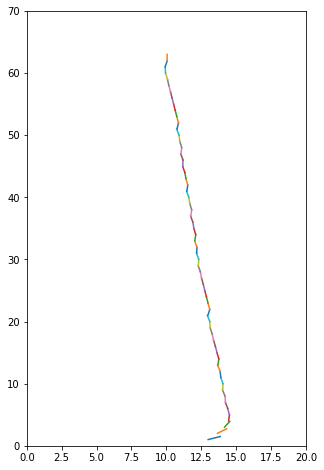

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[3, -30, -29.473684210526315, 1]
[3.753945931383923, -15.758359542040814, -20.45616885858011, 2]
[4.6556714545000615, -5.694519366819607, -26.779081587112753, 3]
[5.544016162376579, 7.324578289645601, -33.20693967516271, 4]
[6.373886562781439, 23.21701630757041, -35.91694720524492, 5]
[7.118170228494339, 40.272999657150805, -40.0, 6]
[7.702641487088568, 59.02023690818831, -40.0, 7]
[8.096951596220807, 77.76747415922581, -40.0, 8]
[8.2592608053896, 96.51471141026332, 26.652911128365197, 9]
[8.157858523545222, 83.55344433357106, 0.4372906454059019, 10]
[8.270131634626642, 83.33480060288215, -0.8605804296021361, 11]
[8.38618602106356, 83.765078683368, 1.620521915616738, 12]
[8.494747847020983, 82.95489875096065, -3.320464418871231, 13]
[8.617192543742547, 84.61443381661988, 5.758556933142333, 14]
[8.710576406712857, 81.73879323913992, -13.

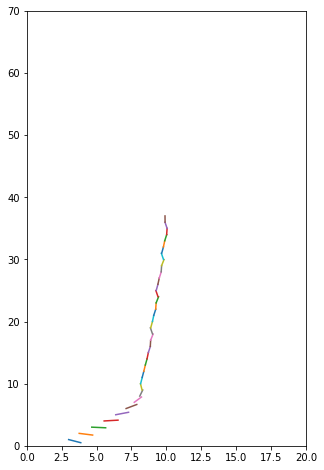

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[10, 90, nan, 1]
# OF change Steering Angle :1


C:\Users\Scrpv\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


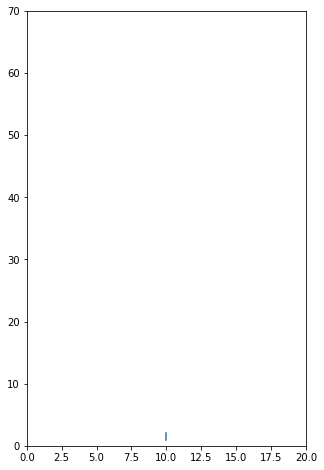

--------------------------------ROUTING ENDED------------------------------


In [14]:
print('Q3 solution: \n Routing with just 3 data from each table : \n')
import math  
test_data = [(13,30),(3,-30),(10,90)]
tested_datas = []
for data1 in test_data:
    print("--------------------------------START ROUTING------------------------------")
    t = 0
    tested_data_rout = []
    tested_data = []
    tested_data.append(data1[0])
    tested_data.append(data1[1])
    while True:
        t = t + 1
        firstSigma = 0
        secondSigma = 0
        i = 0
        for ruleInFinalRules in final_rulesQ3:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            if ruleInFinalRules[2] == 'ang_S3':
                yi = -40
            if ruleInFinalRules[2] == 'ang_S2':
                yi = -20
            if ruleInFinalRules[2] == 'ang_S1':
                yi = -7
            if ruleInFinalRules[2] == 'ang_CE':
                yi = 0
            if ruleInFinalRules[2] == 'ang_B1':
                yi = 7
            if ruleInFinalRules[2] == 'ang_B2':
                yi = 20
            if ruleInFinalRules[2] == 'ang_B3':
                yi = 40
            firstSigma = firstSigma + miOi * yi
        for ruleInFinalRules in final_rulesQ3:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            secondSigma = secondSigma + miOi
        defuzzY = firstSigma / secondSigma
        tested_data.append(defuzzY)
        tested_data.append(t)
        print(tested_data)
        tested_data_rout.append(tested_data)
        new_tested_data = []
        b = 4
        new_tested_data.append(tested_data[0] + math.cos(math.radians(tested_data[1] + tested_data[2])) + math.sin(math.radians(tested_data[2])) * math.sin(math.radians(tested_data[1])))
        new_tested_data.append(tested_data[1] - math.degrees(math.asin((2*math.sin(math.radians(tested_data[2])))/b)))
        if tested_data[0] < 10.5 and tested_data[0] > 9.5 and tested_data[1] < 90.5 and tested_data[1] > 89.5:
            break
        tested_data = new_tested_data
    print("# OF change Steering Angle :"+str(len(tested_data_rout)))
    def draw_line(x,y,angle,length):
        cartesianAngleRadians = (angle)*math.pi/180.0
        terminus_x = x + length * math.cos(cartesianAngleRadians)
        terminus_y = y + length * math.sin(cartesianAngleRadians)
        plt.plot([x, terminus_x],[y,terminus_y])
    plt.figure(figsize=(5, 8))
    plt.axis([0,20,0,70])
    for i in range(0,len(tested_data_rout)):
        draw_line(tested_data_rout[i][0],tested_data_rout[i][3],tested_data_rout[i][1],1)
    plt.show()
    print("--------------------------------ROUTING ENDED------------------------------")

همانطور که میبینید وقتی که فقط از سه داده اول هر جدول استفاده میکنیم دقت الگوریتم بسیار کم میشود و برای رسیدن به هدف گام های بیشتری میطلبد

Now we will add some rules manually

In [15]:
print(final_rulesQ3)

[['pos_S1', 't_ang_S3', 'ang_S3', 0.7619791666666665], ['pos_S1', 't_ang_B1', 'ang_B3', 0.1894715733333334], ['pos_B1', 't_ang_B2', 'ang_B3', 0.3913340277777778], ['pos_B1', 't_ang_S1', 'ang_S3', 0.18947157333333337], ['pos_S2', 't_ang_S3', 'ang_S3', 0.35532], ['pos_S2', 't_ang_S1', 'ang_B2', 0.24137435897435902], ['pos_B2', 't_ang_B3', 'ang_B3', 0.3625309090909091], ['pos_S2', 't_ang_CE', 'ang_B2', 0.8461538461382623], ['pos_B1', 't_ang_B1', 'ang_B3', 0.24643275555555547], ['pos_B2', 't_ang_B1', 'ang_S2', 0.24137435897435902], ['pos_B2', 't_ang_B2', 'ang_B2', 0.9230769230712563], ['pos_S1', 't_ang_S2', 'ang_S3', 0.9999999999979536], ['pos_S1', 't_ang_S1', 'ang_S3', 0.24632017777777787], ['pos_B1', 't_ang_CE', 'ang_S2', 0.3846153846083011], ['pos_B2', 't_ang_CE', 'ang_S2', 0.8461538461382623], ['pos_S2', 't_ang_S2', 'ang_S2', 0.9230769230750341], ['pos_S1', 't_ang_B2', 'ang_B3', 0.36423333333333335], ['pos_S1', 't_ang_CE', 'ang_B2', 0.3846153846083011], ['pos_B1', 't_ang_S2', 'ang_S3',

In [16]:
final_rulesQ3.append(['pos_B2', 't_ang_S1', 'ang_S3'])
final_rulesQ3.append(['pos_S2', 't_ang_B1', 'ang_B3'])
final_rulesQ3.append(['pos_CE', 't_ang_S2', 'ang_S3'])

In [17]:
print('rule with minimum repeat added \n')
rule_num = 1
for mem in final_rulesQ3:
    print(rule_num, ': if X in ', mem[0][4:], 'and Φ in ', mem[1][6:], 'the θ in', mem[2][4:])
    rule_num += 1

rule with minimum repeat added 

1 : if X in  S1 and Φ in  S3 the θ in S3
2 : if X in  S1 and Φ in  B1 the θ in B3
3 : if X in  B1 and Φ in  B2 the θ in B3
4 : if X in  B1 and Φ in  S1 the θ in S3
5 : if X in  S2 and Φ in  S3 the θ in S3
6 : if X in  S2 and Φ in  S1 the θ in B2
7 : if X in  B2 and Φ in  B3 the θ in B3
8 : if X in  S2 and Φ in  CE the θ in B2
9 : if X in  B1 and Φ in  B1 the θ in B3
10 : if X in  B2 and Φ in  B1 the θ in S2
11 : if X in  B2 and Φ in  B2 the θ in B2
12 : if X in  S1 and Φ in  S2 the θ in S3
13 : if X in  S1 and Φ in  S1 the θ in S3
14 : if X in  B1 and Φ in  CE the θ in S2
15 : if X in  B2 and Φ in  CE the θ in S2
16 : if X in  S2 and Φ in  S2 the θ in S2
17 : if X in  S1 and Φ in  B2 the θ in B3
18 : if X in  S1 and Φ in  CE the θ in B2
19 : if X in  B1 and Φ in  S2 the θ in S3
20 : if X in  B1 and Φ in  B3 the θ in B3
21 : if X in  B2 and Φ in  S1 the θ in S3
22 : if X in  S2 and Φ in  B1 the θ in B3
23 : if X in  CE and Φ in  S2 the θ in S3


Q3 solution: 
 Routing : 

--------------------------------START ROUTING------------------------------
[13, 30, -39.99999999999999, 1]
[13.66341394816894, 48.747237251037504, -40.0, 2]
[14.168529916752172, 67.49447450207501, -40.00000000000001, 3]
[14.461750684653005, 86.24171175311251, -22.767037540635588, 4]
[14.52219109056768, 97.39838983464125, -3.431742734345523, 5]
[14.393654266624882, 99.1134915820075, 9.841300866199632, 6]
[14.23759442022054, 94.2110209438579, -12.95180858540862, 7]
[14.16603252809537, 100.64542976675402, 24.55008380949321, 8]
[13.998001808988574, 88.65523738742047, -20.795672728794788, 9]
[14.019941282967283, 98.88047140376275, 11.804205625696419, 10]
[13.868832276009888, 93.00976562750475, -14.944615700744833, 11]
[13.818102103393826, 100.41825980002278, 29.812453886650218, 12]
[13.661201363213031, 86.0246840447428, -22.99257282644896, 13]
[13.725020436863966, 97.28727805458936, 1.333717333585547, 14]
[13.598210435486115, 96.62046455683503, -1.874059149738941

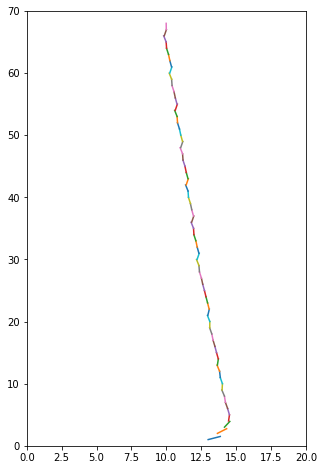

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[3, -30, -29.473684210526315, 1]
[3.753945931383923, -15.758359542040814, -20.45616885858011, 2]
[4.6556714545000615, -5.694519366819607, -26.779081587112753, 3]
[5.544016162376579, 7.324578289645601, -33.20693967516271, 4]
[6.373886562781439, 23.21701630757041, -35.91694720524492, 5]
[7.118170228494339, 40.272999657150805, -40.0, 6]
[7.702641487088568, 59.02023690818831, -40.0, 7]
[8.096951596220807, 77.76747415922581, -40.0, 8]
[8.2592608053896, 96.51471141026332, 26.652911128365197, 9]
[8.157858523545222, 83.55344433357106, 0.4372906454059019, 10]
[8.270131634626642, 83.33480060288215, -0.8605804296021361, 11]
[8.38618602106356, 83.765078683368, 1.620521915616738, 12]
[8.494747847020983, 82.95489875096065, -3.320464418871231, 13]
[8.617192543742547, 84.61443381661988, 5.758556933142333, 14]
[8.710576406712857, 81.73879323913992, -13.

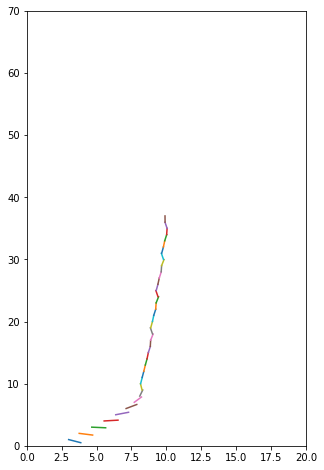

--------------------------------ROUTING ENDED------------------------------
--------------------------------START ROUTING------------------------------
[10, 90, nan, 1]
# OF change Steering Angle :1


C:\Users\Scrpv\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


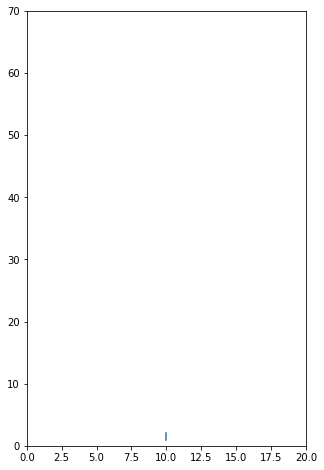

--------------------------------ROUTING ENDED------------------------------


In [18]:
print('Q3 solution: \n Routing : \n')
import math  
test_data = [(13,30),(3,-30),(10,90)]
tested_datas = []
for data1 in test_data:
    print("--------------------------------START ROUTING------------------------------")
    t = 0
    tested_data_rout = []
    tested_data = []
    tested_data.append(data1[0])
    tested_data.append(data1[1])
    while True:
        t = t + 1
        firstSigma = 0
        secondSigma = 0
        i = 0
        for ruleInFinalRules in final_rulesQ3:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            if ruleInFinalRules[2] == 'ang_S3':
                yi = -40
            if ruleInFinalRules[2] == 'ang_S2':
                yi = -20
            if ruleInFinalRules[2] == 'ang_S1':
                yi = -7
            if ruleInFinalRules[2] == 'ang_CE':
                yi = 0
            if ruleInFinalRules[2] == 'ang_B1':
                yi = 7
            if ruleInFinalRules[2] == 'ang_B2':
                yi = 20
            if ruleInFinalRules[2] == 'ang_B3':
                yi = 40
            firstSigma = firstSigma + miOi * yi
        for ruleInFinalRules in final_rulesQ3:
            mIi1 = skf.interp_membership(x_pos, pos_mf[ruleInFinalRules[0]], tested_data[0])
            mIi2 = skf.interp_membership(x_t_ang, t_ang_mf[ruleInFinalRules[1]], tested_data[1])
            miOi = mIi1 * mIi2
            secondSigma = secondSigma + miOi
        defuzzY = firstSigma / secondSigma
        tested_data.append(defuzzY)
        tested_data.append(t)
        print(tested_data)
        tested_data_rout.append(tested_data)
        new_tested_data = []
        b = 4
        new_tested_data.append(tested_data[0] + math.cos(math.radians(tested_data[1] + tested_data[2])) + math.sin(math.radians(tested_data[2])) * math.sin(math.radians(tested_data[1])))
        new_tested_data.append(tested_data[1] - math.degrees(math.asin((2*math.sin(math.radians(tested_data[2])))/b)))
        if tested_data[0] < 10.5 and tested_data[0] > 9.5 and tested_data[1] < 90.5 and tested_data[1] > 89.5:
            break
        tested_data = new_tested_data
    print("# OF change Steering Angle :"+str(len(tested_data_rout)))
    def draw_line(x,y,angle,length):
        cartesianAngleRadians = (angle)*math.pi/180.0
        terminus_x = x + length * math.cos(cartesianAngleRadians)
        terminus_y = y + length * math.sin(cartesianAngleRadians)
        plt.plot([x, terminus_x],[y,terminus_y])
    plt.figure(figsize=(5, 8))
    plt.axis([0,20,0,70])
    for i in range(0,len(tested_data_rout)):
        draw_line(tested_data_rout[i][0],tested_data_rout[i][3],tested_data_rout[i][1],1)
    plt.show()
    print("--------------------------------ROUTING ENDED------------------------------")

###                           :)